<a href="https://colab.research.google.com/github/eduardoalbertorg/UAG_reconocimiento_patrones/blob/main/PDI_UAG_09Junio22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ejemplo de procesamiento de imágenes con python**

In [ ]:
#Cargar archivo de imagen
from google.colab import files
uploaded = files.upload()

Saving Carta.jpg to Carta.jpg


In [ ]:
#Cargar librerias
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
#Lectura de Archivo
imagen = cv2.imread('Carta.jpg') 

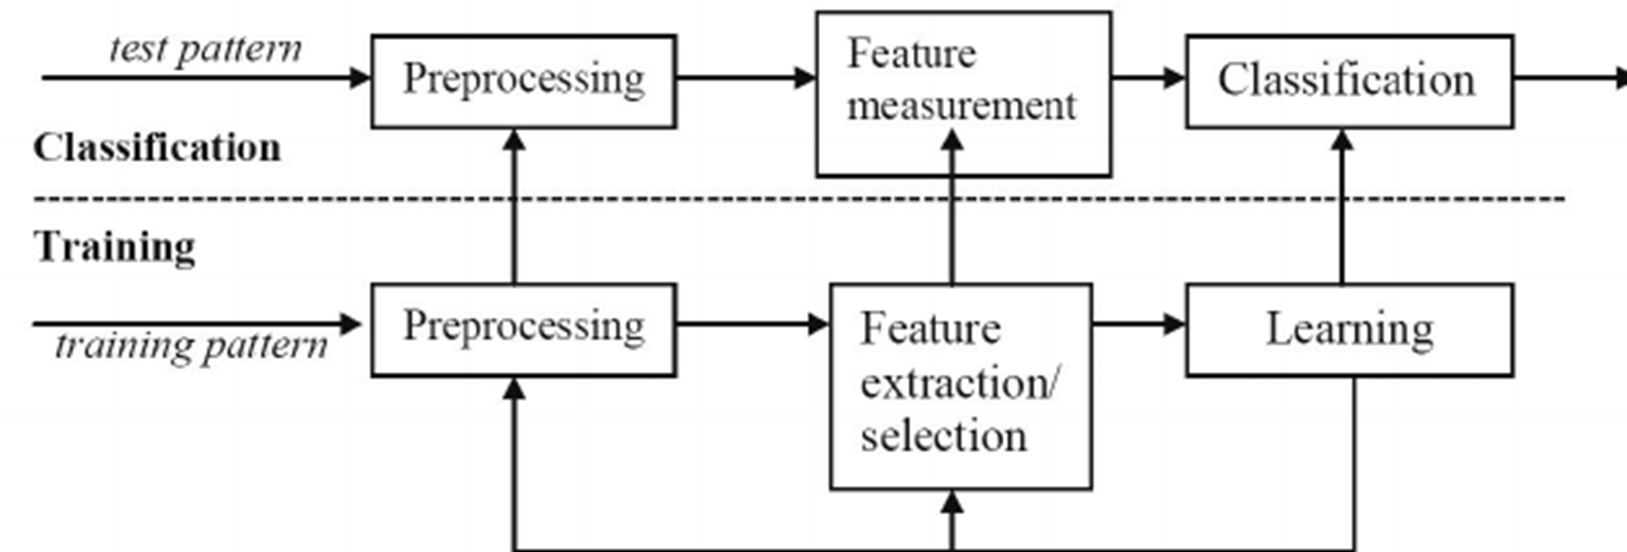

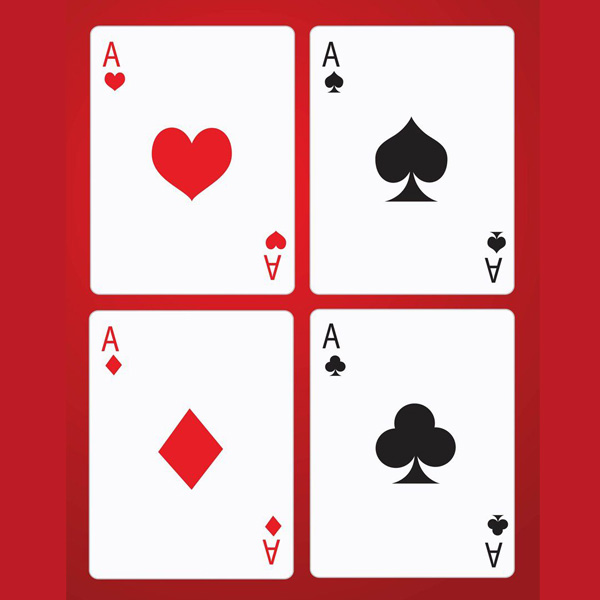

In [ ]:
cv2_imshow(imagen)

In [ ]:
imagen.shape

(600, 600, 3)

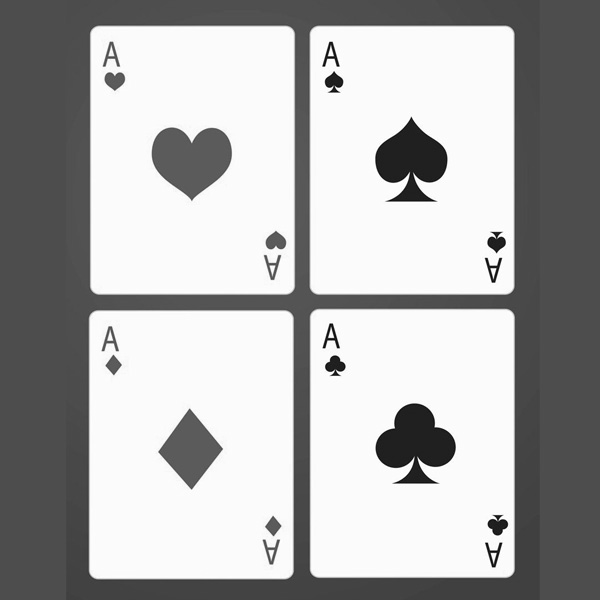

In [ ]:
grises=cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
cv2_imshow(grises)

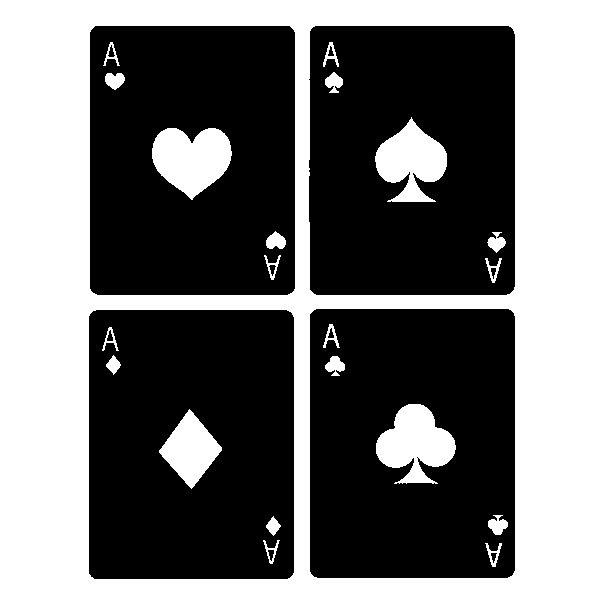

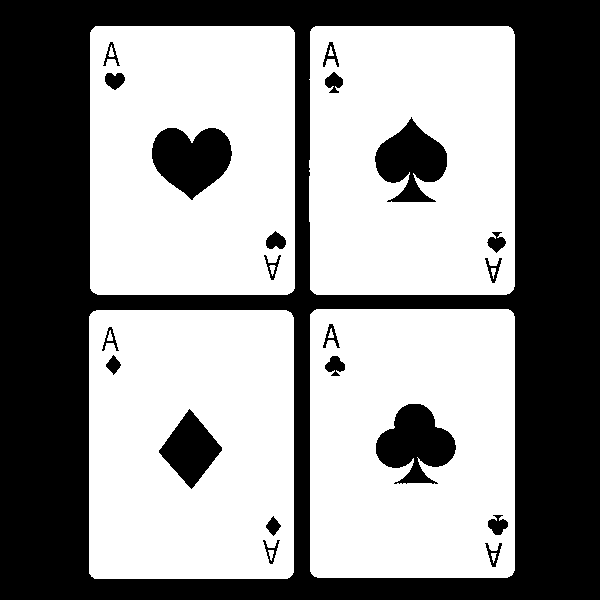

In [ ]:
_,th=cv2.threshold(grises,128,255,cv2.THRESH_BINARY_INV)
cv2_imshow(th)
cv2_imshow(~th)

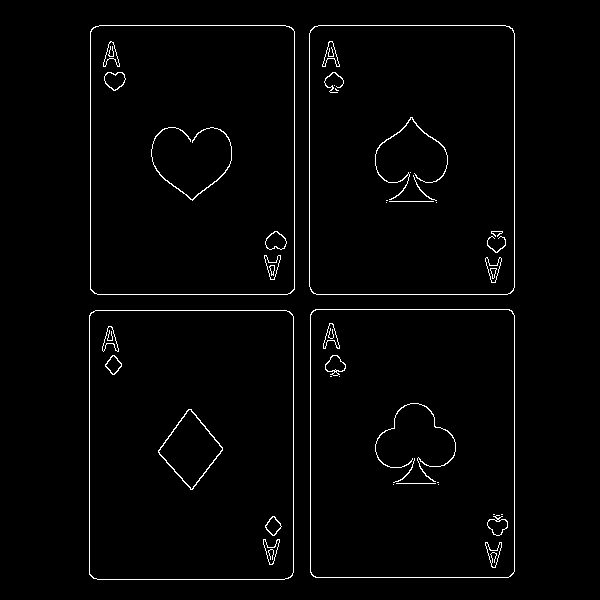

In [ ]:
#Filtrado de Canny
bordes = cv2.Canny(grises,100,200)
cv2_imshow(bordes)

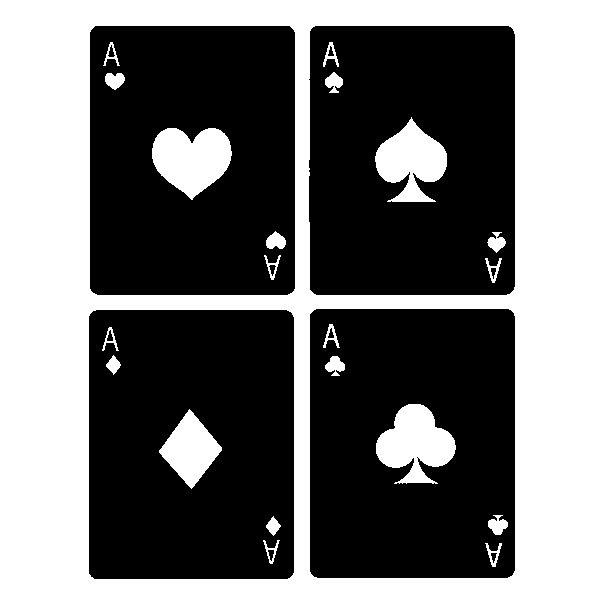

In [ ]:
cv2_imshow(th)

In [ ]:
#Filtrado Sobel
sobel_x = cv2.Sobel(grises,cv2.CV_64F,0,1,ksize = 3)
sobel_y = cv2.Sobel(grises,cv2.CV_64F,1,0,ksize = 3)

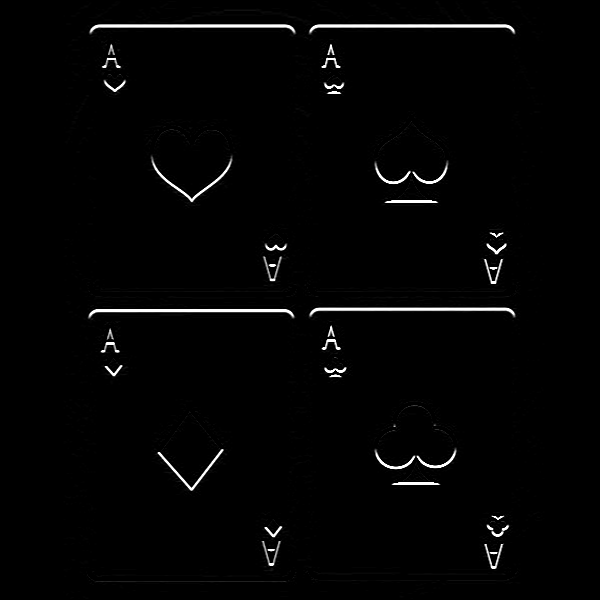

In [ ]:
cv2_imshow(sobel_x)


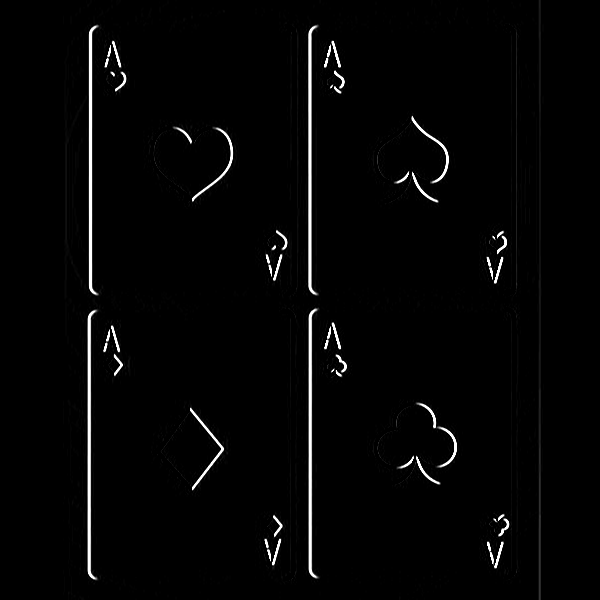

In [ ]:
cv2_imshow(sobel_y)

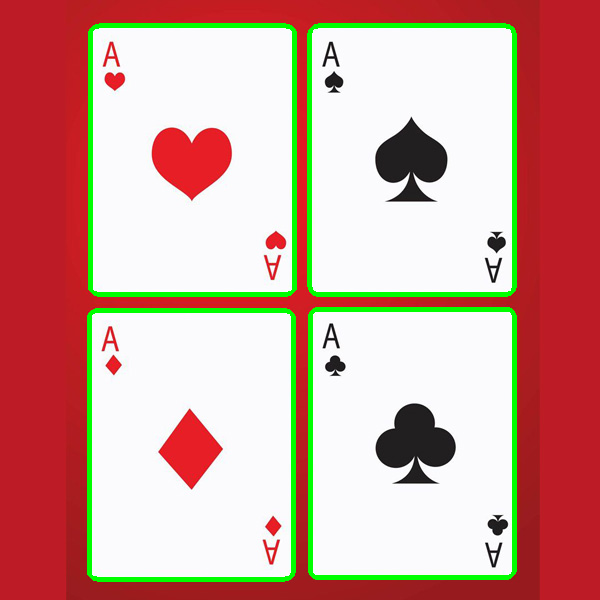

In [ ]:
result = cv2.findContours(bordes,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
contours, hierarchy = result if len(result) == 2 else result[1:3]
cv2.drawContours(imagen,contours,-1,(0,255,0),3)
cv2_imshow(imagen)

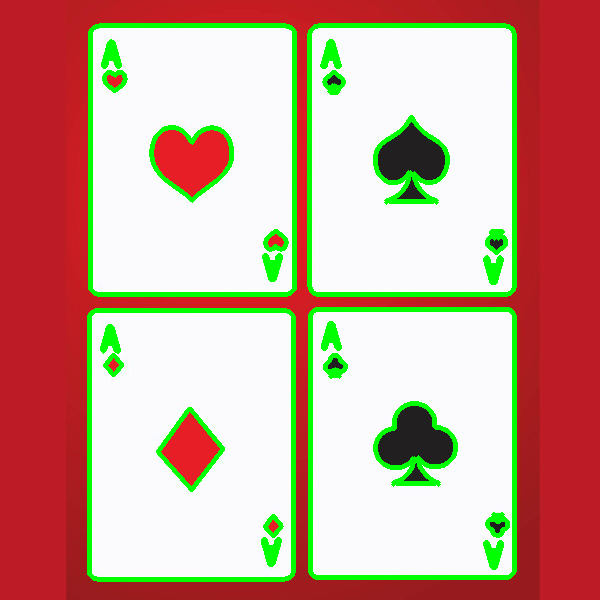

In [ ]:
result = cv2.findContours(bordes,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
contours, hierarchy = result if len(result) == 2 else result[1:3]
cv2.drawContours(imagen,contours,-1,(0,255,0),3)
cv2_imshow(imagen)

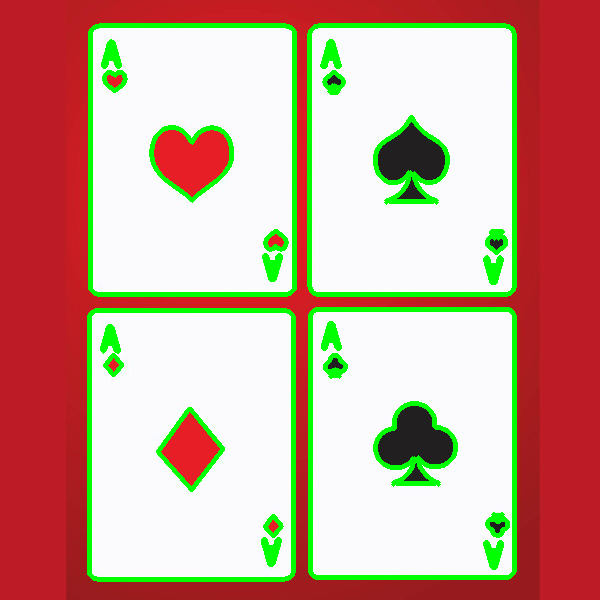

In [ ]:
bordes = cv2.Canny(grises, 100, 200)
result = cv2.findContours(bordes,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
contours, hierarchy = result if len(result) == 2 else result[1:3]
cv2_imshow(imagen)


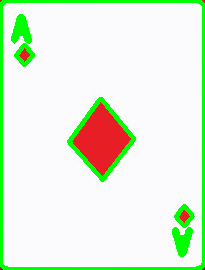

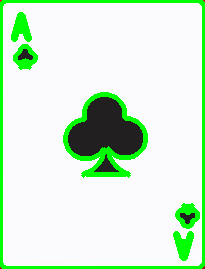

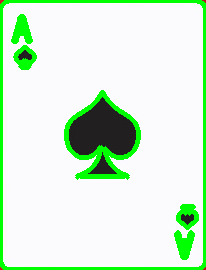

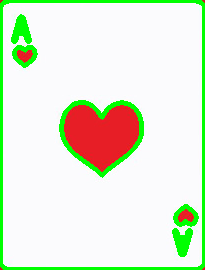

In [ ]:
cont=1
for i in contours:
  M = cv2.moments(i)
  x1 = int(M["m10"]/M["m00"])
  y1 = int(M["m01"]/M["m00"])
  (x,y,w,h) = cv2.boundingRect(i)
  recortada = imagen[y:y+h,x:x+w]
  cv2.imwrite(('imagen'+str(cont)+'.jpg'),recortada)
  cv2_imshow(recortada)
  cont=cont+1